## KMEANS CLUSTERING

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
from sklearn.datasets.samples_generator import make_blobs

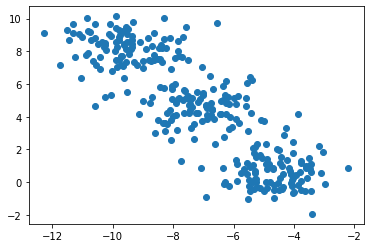

In [5]:
X,y=make_blobs(n_samples=300,cluster_std =1.00,random_state=12)
plt.scatter(X[:,0],X[:,1])
plt.show()

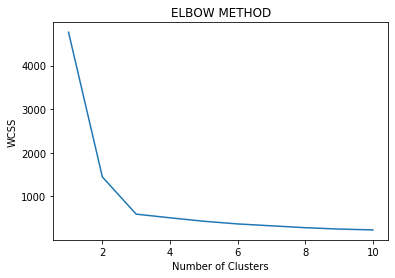

In [7]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

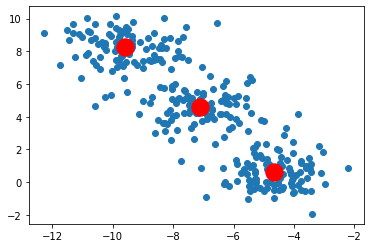

In [8]:
kmeans=KMeans(n_clusters=3)
pred_y=kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1],cmap='viridas')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()

## KNN

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
iris=load_iris()
x=iris.data
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=24)
scores={}
scores_list=[]
krange=range(1,26)
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,ypred)
    scores_list.append(metrics.accuracy_score(y_test,ypred))


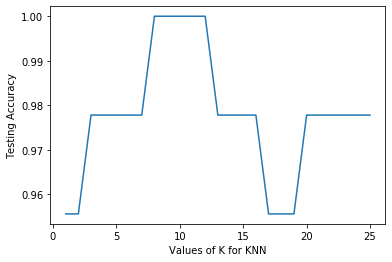

In [20]:
plt.plot(krange,scores_list)
plt.xlabel("Values of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

## HIERARCHICAL

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

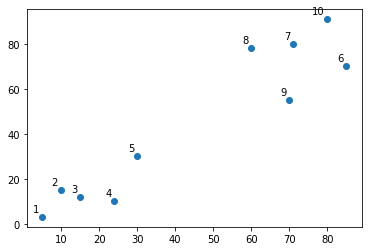

In [25]:
X=np.array([[5,3],
           [10,15],
           [15,12],
           [24,10],
           [30,30],
           [85,70],
           [71,80],
           [60,78],
           [70,55],
           [80,91] ])
labels=range(1,11)
plt.scatter(X[:,0],X[:,1],label='True Position')
for label,x,y in zip(labels,X[:,0],X[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
plt.show()

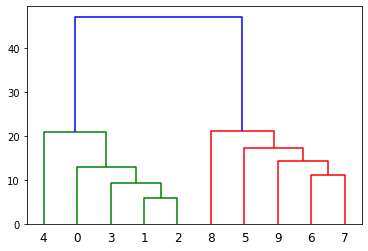

In [26]:
linked=linkage(X,'single')
labellist=range(1,11)
dendrogram(linked,orientation='top',distance_sort='descending',
          show_leaf_counts=True)
plt.show()

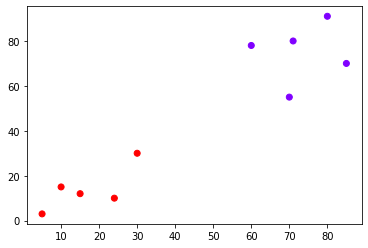

In [27]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap='rainbow')
plt.show()